In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint

from sklearn.metrics import accuracy_score

In [ ]:
dataO = pd.read_csv('WESAD_Undersample.csv')

In [ ]:
dataO

,ACC_0,ACC_1,ACC_2,BVP,EDA,TEMP,labels
0,57.0,6.0,27.0,11.77,0.262513,33.41,0.0
1,63.0,0.0,-3.0,-8.78,0.218093,34.34,0.0
2,54.0,25.0,20.0,7.22,0.448733,35.79,0.0
3,38.0,29.0,42.0,-39.62,0.350760,33.41,0.0
4,-33.0,-7.0,-55.0,25.47,0.119230,33.07,0.0
...,...,...,...,...,...,...,...
60084,-59.0,3.0,26.0,-3.29,0.931742,32.57,3.0
60085,25.0,55.0,20.0,23.08,4.274080,34.73,3.0
60086,42.0,-19.0,43.0,-5.04,5.577428,34.95,3.0
60087,-24.0,-28.0,-53.0,-39.57,1.541037,33.45,3.0


In [ ]:
dataO=dataO.drop(columns=['BVP'])

In [ ]:
dataO.describe()

,ACC_0,ACC_1,ACC_2,EDA,TEMP,labels
count,60089.000000,60089.000000,60089.00000,60089.000000,60089.000000,60089.000000
mean,17.004776,-1.673285,12.85167,1.746161,32.924287,1.491155
std,45.373321,26.723545,28.65594,1.951066,1.490149,1.119592
min,-107.000000,-75.000000,-72.00000,0.074584,28.990000,0.000000
25%,-31.000000,-17.000000,-6.00000,0.320079,31.930000,0.000000
50%,35.000000,0.000000,13.00000,0.790654,33.070000,1.000000
75%,57.000000,13.000000,36.00000,2.873900,34.000000,2.000000
max,127.000000,76.000000,95.00000,8.904065,35.970000,3.000000


In [ ]:
dataO.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60089 entries, 0 to 60088
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ACC_0   60089 non-null  float64
 1   ACC_1   60089 non-null  float64
 2   ACC_2   60089 non-null  float64
 3   EDA     60089 non-null  float64
 4   TEMP    60089 non-null  float64
 5   labels  60089 non-null  float64
dtypes: float64(6)
memory usage: 2.8 MB


NORMALIZE

In [ ]:
X = dataO.drop(columns=['labels'])
y = dataO['labels']

In [ ]:
import pandas as pd
import numpy as np

def normalize_data(X):
    return (X - np.mean(X)) / np.std(X)

def denormalize_data(normalized_data, original_data):
    return normalized_data * np.std(original_data) + np.mean(original_data)

X = normalize_data(X)

In [ ]:
denormalized_data = denormalize_data(X, dataO.drop(columns=['labels']))

In [ ]:
X

,ACC_0,ACC_1,ACC_2,EDA,TEMP
0,0.979202,-0.245880,0.503540,-6.308506,13.984815
1,1.111439,-0.470403,-0.543373,-6.331273,14.608919
2,0.913083,0.465110,0.259260,-6.213060,15.581984
3,0.560450,0.614792,1.026996,-6.263276,13.984815
4,-1.004359,-0.732346,-2.358020,-6.381945,13.756648
...,...,...,...,...,...
60084,-1.577388,-0.358141,0.468642,-5.965497,13.421108
60085,0.273936,1.587725,0.259260,-4.252399,14.870640
60086,0.648609,-1.181392,1.061893,-3.584375,15.018277
60087,-0.806003,-1.518177,-2.288226,-5.653206,14.011658


In [ ]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
60084    3.0
60085    3.0
60086    3.0
60087    3.0
60088    3.0
Name: labels, Length: 60089, dtype: float64

In [ ]:
y.value_counts()

labels
1.0    15262
0.0    15155
3.0    14996
2.0    14676
Name: count, dtype: int64

In [ ]:
# testovacia sada 8/2
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# trénovacia sada / validačná sada . 8/2
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42)

EVALVACIA

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    'SGD': SGDClassifier(),
    'NB': GaussianNB(),
    'GBT': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'ANN': MLPClassifier()
}

#evalvácia
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy}')

best_model = max(results, key=results.get)
print(f'Best Model: {best_model}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.39407555333666167
Decision Tree Accuracy: 0.9808620402729239
Random Forest Accuracy: 0.9886836412048594
SVM Accuracy: 0.45032451323015477
k-NN Accuracy: 0.9220336162423032
SGD Accuracy: 0.3402396405391912
NB Accuracy: 0.38600432684306873
GBT Accuracy: 0.8969878515559994
XGBoost Accuracy: 0.9861873855882842
ANN Accuracy: 0.7151772341487769
Best Model: Random Forest


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report

models = {
    #out 'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    #out 'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    #out 'SGD': SGDClassifier(),
    #out 'NB': GaussianNB(),
    #out 'GBT': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
    #out 'ANN': MLPClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f'{model_name} Classification Report:\n{report}')

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      3020
         1.0       0.98      0.98      0.98      2984
         2.0       0.98      0.98      0.98      2994
         3.0       0.98      0.98      0.98      3020

    accuracy                           0.98     12018
   macro avg       0.98      0.98      0.98     12018
weighted avg       0.98      0.98      0.98     12018

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3020
         1.0       0.99      0.99      0.99      2984
         2.0       0.99      0.99      0.99      2994
         3.0       0.99      0.98      0.98      3020

    accuracy                           0.99     12018
   macro avg       0.99      0.99      0.99     12018
weighted avg       0.99      0.99      0.99     12018

k-NN Classification Report:
              precision    r

Hyperparametre

In [ ]:
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None] + list(range(10, 31)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

rf_clf = RandomForestClassifier(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(rf_clf, param_distributions=param_dist, n_iter=100, cv=cv, verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 178}


TRÉNOVANIE

In [ ]:
best_params = {'class_weight': 'balanced', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 178}
best_model = RandomForestClassifier(**best_params)

best_model.fit(X_train, y_train)

# Ténovacia sada
train_predictions = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# validačná sada
val_predictions = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# kontrola overfitting
if train_accuracy > val_accuracy:
    print("Pozor, Overfitting")
else:
    print("žiadny overfitting")

Training Accuracy: 0.9983912573156186
Validation Accuracy: 0.9866866367115993
Pozor, Overfitting


In [ ]:
best_params = {'class_weight': 'balanced', 'max_depth': 13, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 178}

best_model = RandomForestClassifier(**best_params)

best_model.fit(X_train, y_train)

# trénvoacia sada
train_predictions = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# validačná sada
val_predictions = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

# krížovaá validácia
cv_scores = cross_val_score(best_model, X_train, y_train, cv=10)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

# kontrola overfittingu
if np.mean(cv_scores) < val_accuracy:
    print("Pozor, Overfitting !")
else:
    print("žiadny overfitting.")

Training Accuracy: 0.9906249133220536
Validation Accuracy: 0.9811116658345814
Cross-Validation Scores: [0.98197449 0.98252912 0.98031059 0.98335645 0.98196949 0.97808599
 0.9852982  0.98169209 0.9814147  0.98363384]
Mean CV Accuracy: 0.9820264961387363
žiadny overfitting.


In [ ]:
best_params = {'class_weight': 'balanced', 'max_depth': 13, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 178}

best_model = RandomForestClassifier(**best_params)

# krížová validácia
cv_scores = cross_val_score(best_model, X_train, y_train, cv=10)
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

best_model.fit(X_train, y_train)

# najlepšie premenné
feature_importances = best_model.feature_importances_
print("Feature Importances:", feature_importances)
sfm = SelectFromModel(best_model, threshold='median')
sfm.fit(X_train, y_train)
X_train_selected = sfm.transform(X_train)

best_model.fit(X_train_selected, y_train)

# testovacia sada
X_test_selected = sfm.transform(X_test)
y_pred = best_model.predict(X_test_selected)

# accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

Cross-validation Scores: [0.97920133 0.97809207 0.98086522 0.98113731 0.97975035 0.97642164
 0.98280166 0.98030513 0.97891817 0.98280166]
Mean CV Accuracy: 0.9800294546844794
Feature Importances: [0.13606315 0.14397053 0.12685187 0.00975131 0.28717201 0.29619112]
Test Accuracy: 0.9761191546014312


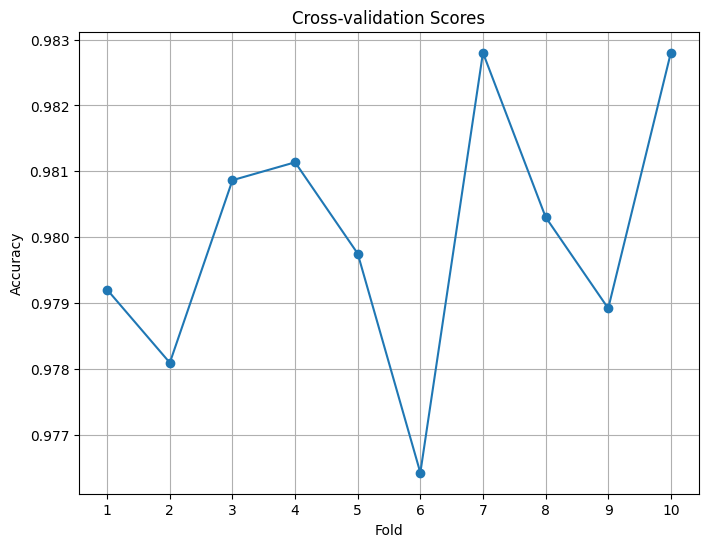

In [ ]:
import matplotlib.pyplot as plt

# vizualizácia krížovej validácie
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores)+1), cv_scores, marker='o', linestyle='-')
plt.title('Cross-validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(cv_scores)+1))
plt.grid(True)
plt.show()


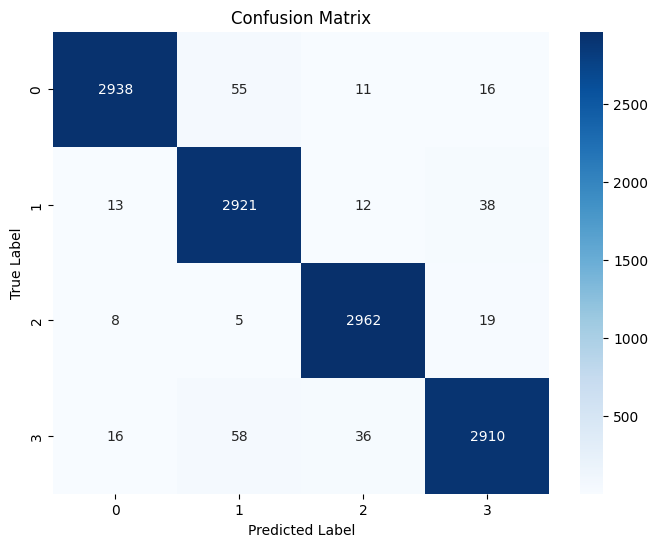

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

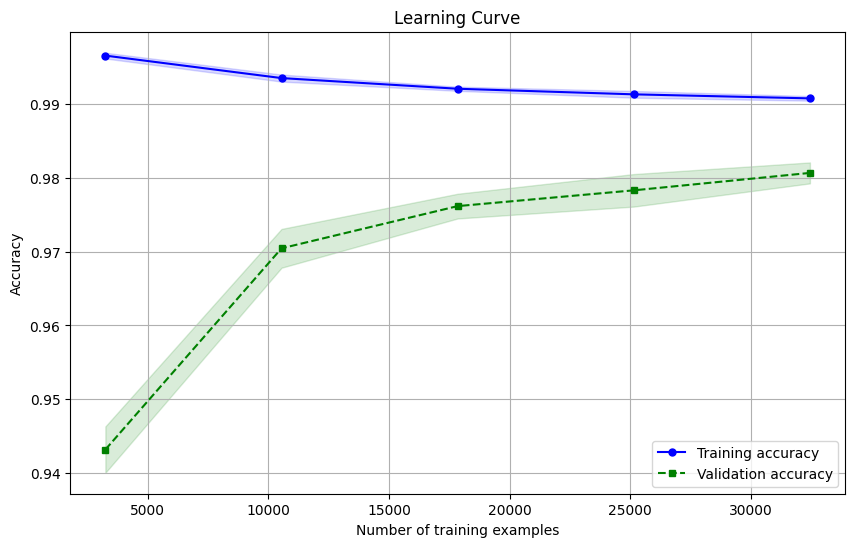

In [ ]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train, y_train, cv=10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.show()

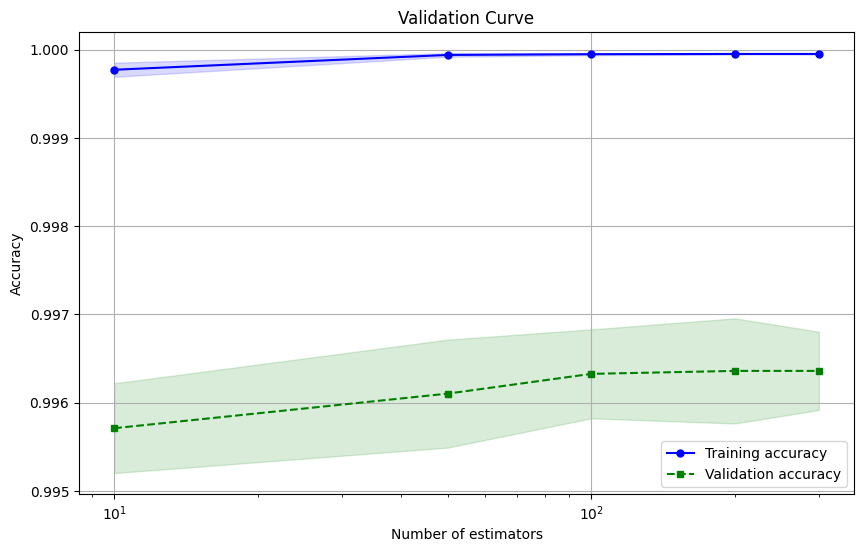

In [ ]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

param_range = [10, 50, 100, 200, 300]

train_scores, test_scores = validation_curve(
    RandomForestClassifier(**best_params),
    X_train,
    y_train,
    param_name="n_estimators",
    param_range=param_range,
    cv=5
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Validation Curve')
plt.show()

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, best_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 6 features, but RandomForestClassifier is expecting 3 features as input.

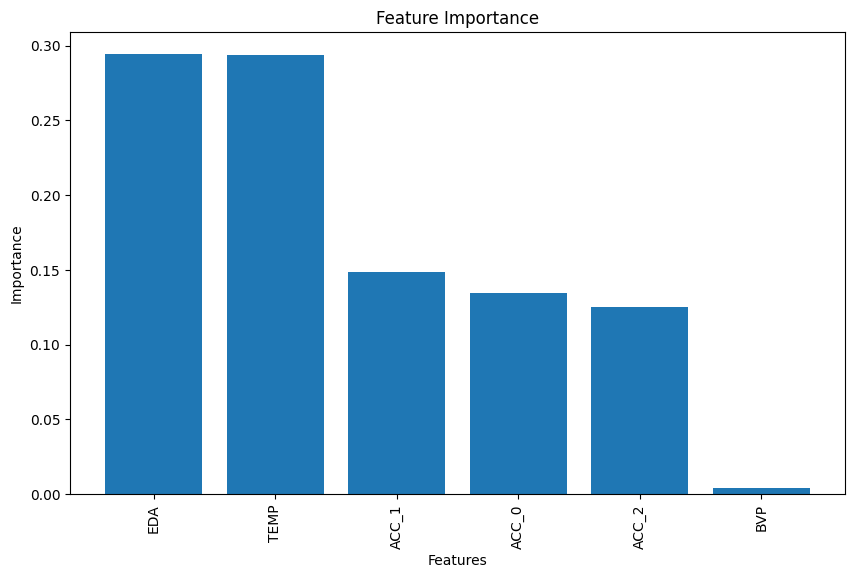

In [ ]:
feature_importances = best_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx], align='center')
plt.xticks(range(X_train.shape[1]), features[sorted_idx], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

ValueError: multiclass format is not supported

FINAL

In [ ]:
import joblib
joblib.dump(best_model, 'Undersample_model_All_4.pkl')

['Undersample_model_All_4.pkl']

In [ ]:
loaded_model = joblib.load('Undersample_model_All_4.pkl')
new_data_predictions = loaded_model.predict(X_test)
predictions_df = pd.DataFrame(new_data_predictions, columns=['predictions'])
predictions_df

,predictions
0,3.0
1,3.0
2,2.0
3,0.0
4,0.0
...,...
24012,1.0
24013,0.0
24014,1.0
24015,0.0


In [ ]:
y_test

108293    3.0
101946    3.0
78914     2.0
4270      0.0
30196     0.0
         ... 
57810     1.0
19633     0.0
57341     1.0
13438     0.0
65718     2.0
Name: labels, Length: 24017, dtype: float64

In [ ]:
traget_df = y_test.reset_index(drop=True)

In [ ]:
aligned_df = pd.concat([predictions_df, traget_df], axis=1)

aligned_df

,predictions,labels
0,3.0,3.0
1,3.0,3.0
2,2.0,2.0
3,0.0,0.0
4,0.0,0.0
...,...,...
24012,1.0,1.0
24013,0.0,0.0
24014,1.0,1.0
24015,0.0,0.0


In [ ]:
same_values = (aligned_df['predictions'] == aligned_df['labels']).sum()
different_values = (aligned_df['predictions'] != aligned_df['labels']).sum()

print("Number of rows with the same values:", same_values)
print("Number of rows with different values:", different_values)

Number of rows with the same values: 23871
Number of rows with different values: 146
